In [1]:
# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

# 
import matplotlib.pyplot as plt

# graphs
%matplotlib inline

# style
plt.style.use('seaborn')

#import the data
df = pd.read_csv("data/muestreo_con_indices.csv")
df.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,N_TOTAL,RVI,CIred_edge,TCARI_OSAVI_RE
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,3.26,1.520898,0.161725,2.154459
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,3.31,1.511626,0.167301,2.188258
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,3.78,1.592500,0.172282,2.167296
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,3.48,1.736582,0.208449,2.237800
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,3.49,1.600575,0.221476,2.164132


In [2]:
df.columns

Index(['FECHA', 'x', 'y', 'MCARI_OSAVI', 'CI_green', 'NDRE', 'NDVI',
       'MCARI_OSAVI_RE', 'MTCI', 'TCARI_OSAVI', 'CCCI_simpl', 'GNDVI', 'CCCI',
       'N_TOTAL', 'RVI', 'CIred_edge', 'TCARI_OSAVI_RE'],
      dtype='object')

In [3]:
cols = ['FECHA', 'x', 'y', 'MCARI_OSAVI', 'CI_green', 'NDRE', 'NDVI',
       'MCARI_OSAVI_RE', 'MTCI', 'TCARI_OSAVI', 'CCCI_simpl', 'GNDVI', 'CCCI',
       'RVI', 'CIred_edge', 'TCARI_OSAVI_RE','N_TOTAL']


In [4]:
df = df[cols]
df.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE,N_TOTAL
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459,3.26
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258,3.31
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296,3.78
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800,3.48
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132,3.49


In [5]:
X = df
y = X.pop("N_TOTAL")

In [6]:
X.count()

FECHA             162
x                 162
y                 162
MCARI_OSAVI       162
CI_green          162
NDRE              162
NDVI              162
MCARI_OSAVI_RE    162
MTCI              162
TCARI_OSAVI       162
CCCI_simpl        162
GNDVI             162
CCCI              162
RVI               162
CIred_edge        162
TCARI_OSAVI_RE    162
dtype: int64

In [8]:

X.count()


FECHA             162
x                 162
y                 162
MCARI_OSAVI       162
CI_green          162
NDRE              162
NDVI              162
MCARI_OSAVI_RE    162
MTCI              162
TCARI_OSAVI       162
CCCI_simpl        162
GNDVI             162
CCCI              162
RVI               162
CIred_edge        162
TCARI_OSAVI_RE    162
dtype: int64

66.23560125
3.6300179960000003
55.544300800000066
208.29112800000016
20.004128494341185


In [9]:
# get just the numeric variables by selecting only the variables that are not "object" datatypes
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head(10)

,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE
0,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459
1,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258
2,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296
3,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800
4,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132
5,673055,2834900,0.244962,0.979648,0.087967,0.206629,0.258192,0.903606,1.172938,0.264985,0.328648,0.426990,1.521703,0.192978,2.182215
6,673174,2834640,0.266601,0.946594,0.072872,0.190868,0.164325,0.741186,1.300863,0.139618,0.321137,0.382338,1.472472,0.157310,2.128348
7,673177,2834950,0.305626,1.257123,0.090900,0.270798,0.197606,0.644648,1.391197,0.289347,0.385795,0.335682,1.743250,0.200117,2.227669
8,673184,2834661,0.308447,1.207189,0.086401,0.273490,0.173436,0.591143,1.378921,0.251979,0.375673,0.316236,1.756289,0.189377,2.118948
9,673198,2834685,0.289723,1.100163,0.074131,0.226684,0.114325,0.598586,1.355004,0.150069,0.354695,0.327098,1.586881,0.160238,2.011704


In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
X["C_TEXTURAL"] = lb_make.fit_transform(X["CLASE TEXTURAL"])
X.head(10)

KeyError: 'CLASE TEXTURAL'

In [11]:
X.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132


In [28]:
X.drop("CLASE TEXTURAL", axis=1, inplace=True)
X.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,...,SPAD,NO3-NH4,M.O.,P2O5 mg/kg,P2O5 kg/ha,%Humedad,% ARENA,% ARCILLA,% LIMO,C_TEXTURAL
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,...,37.1,39.062021,1.544575,26.692742,100.097782,12.401674,61.32,23.04,15.64,0
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,...,33.1,39.062021,2.214359,49.234674,184.630027,11.348964,63.32,23.04,13.64,0
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,...,38.6,13.586790,1.545501,98.296526,368.611973,13.609898,65.32,19.04,15.64,1
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,...,37.6,22.078534,1.879976,46.582682,174.685057,13.875823,65.32,20.68,14.00,0
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,...,37.1,20.380185,3.422192,122.827452,460.602945,12.392777,67.32,18.68,14.00,1


In [12]:
# letś build our first model. I always have oob_score=True. It is a good idea to increase n_estimators
#  to a number higher than the defaul. in this case the oob_predictions will be based on a forest of 33 trees.
# I set random_state=42 so that you all could replicate the model exactly
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)

# I only use numeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [13]:
# for regression, the oob_score attribute gives the R^2 based on the obb predictions. We want to use c-stat,
# for awareness. By the way, attibutes in skelearn that have a trailing underscore are only available after
# the model has been run
model.oob_score_

0.7781381528471765

In [14]:
# model score
model.score(X[numeric_variables],y)
# if the y is a binary dtype
# y_oob = model.oob_prediction_
# print(c-stat: ", roc_auc_score(y, y_oob))

0.9710788743645716

In [15]:
# drop the variables x and y
X.drop(["FECHA"], axis=1, inplace=True)

In [16]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=0)
model.fit(X,y)

print(model.score(X,y))

# binary values in y
#print("c-stat: ", roc_auc_score(y, model.oob_prediction_))

0.9710788743645716


In [17]:
# variable importance
model.feature_importances_

array([0.01303828, 0.04234708, 0.020315  , 0.054808  , 0.00523113,
       0.02581156, 0.04235745, 0.01397102, 0.58917686, 0.01367516,
       0.06051758, 0.01148755, 0.0290417 , 0.0329223 , 0.04529934])

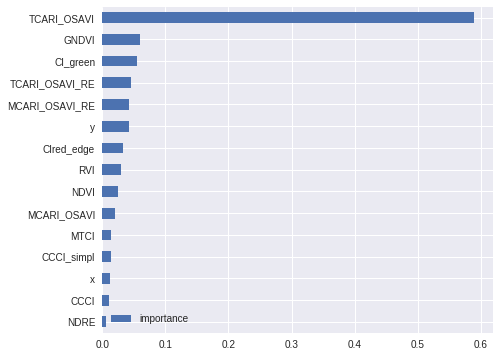

In [18]:
# simple version that shows all of the variables
feature_importances = pd.DataFrame({"importance": model.feature_importances_}, index=X.columns)
feature_importances.sort_values(by=["importance"], inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6))

30 trees
0.9618545300341905

50 trees
0.9664008369447827

100 trees
0.9710788743645716

200 trees
0.9708039091732609

500 trees
0.9704631987370043

1000 trees
0.970855612663143

2000 trees
0.9708193305670738



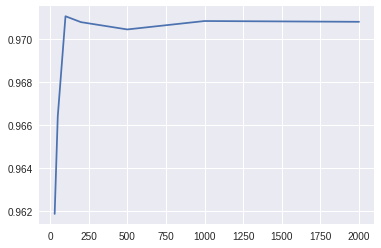

In [19]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=0)
    model.fit(X, y)
    print (trees, "trees")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, n_estimator_options).plot();

auto option
0.970855612663143

None option
0.970855612663143

sqrt option
0.971961595882257

log2 option
0.9719615958822571

0.9 option
0.9709518895359889

0.2 option
0.9719615958822571



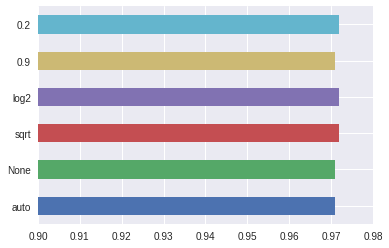

In [20]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=0, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.9,.98));


1 min samples
0.9719615958822571

2 min samples
0.9459990313990796

3 min samples
0.9191428550225023

4 min samples
0.8971538674663125

5 min samples
0.8799057860608271

6 min samples
0.863878407904171

7 min samples
0.8515176234207408

8 min samples
0.8389937826823498

9 min samples
0.8291553661360418

10 min samples
0.8186201679134867



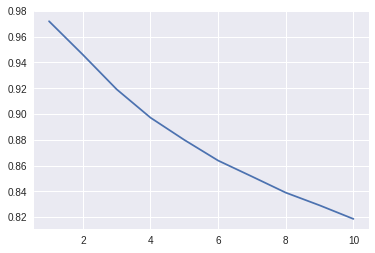

In [21]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=0, 
                                  max_features="sqrt", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print (min_samples, "min samples")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, min_samples_leaf_options).plot();

In [22]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=0, 
                              max_features="auto", 
                              min_samples_leaf=1)
model.fit(X, y)

print (model.score(X,y))
# roc = roc_auc_score(y, model.oob_prediction_)
# print ("C-stat: ", roc)

0.970855612663143


In [23]:
# Make train and test datasets
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.85


In [25]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.47


In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.7


/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
data = pd.DataFrame({"N_TOTAL": y_test, "Pred": model.predict(X_test)})

/home/jorge/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


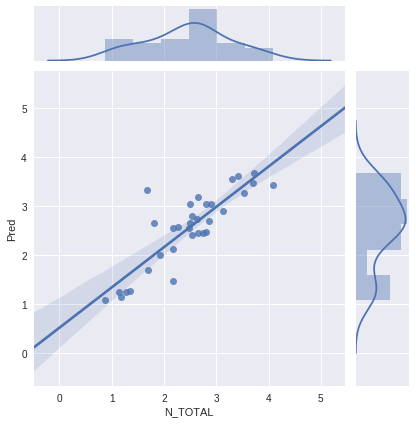

In [28]:
import seaborn as sns
sns.jointplot("N_TOTAL", "Pred", data=data, kind="reg")

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores  

array([ -0.15046895,   0.12680503,  -0.69307515,  -2.16258681,
       -10.94108419])

In [30]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -2.76 (+/- 8.33)


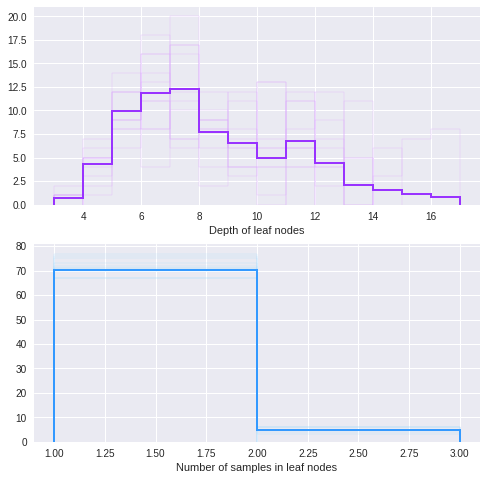

In [31]:
from sklearn.tree import _tree, export_graphviz
import matplotlib.pyplot as plt
def leaf_depths(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        depths = np.array([0])

    else:
        
        left_depths = leaf_depths(tree, left_child) + 1
        right_depths = leaf_depths(tree, right_child) + 1

        depths = np.append(left_depths, right_depths)

    return depths

def leaf_samples(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        samples = np.array([tree.n_node_samples[node_id]])

    else:
        
        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)

        samples = np.append(left_samples, right_samples)

    return samples

def draw_tree(ensemble, tree_id=0):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    tree = ensemble.estimators_[tree_id].tree_

    depths = leaf_depths(tree)
    plt.hist(depths, histtype='step', color='#9933ff', 
             bins=range(min(depths), max(depths)+1))

    plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
    plt.subplot(212)
    
    samples = leaf_samples(tree)
    plt.hist(samples, histtype='step', color='#3399ff', 
             bins=range(min(samples), max(samples)+1))
    
    plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
    
    plt.show()

def draw_ensemble(ensemble):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    depths_all = np.array([], dtype=int)

    for x in ensemble.estimators_:
        tree = x.tree_
        depths = leaf_depths(tree)
        depths_all = np.append(depths_all, depths)
        plt.hist(depths, histtype='step', color='#ddaaff', 
                 bins=range(min(depths), max(depths)+1))

    plt.hist(depths_all, histtype='step', color='#9933ff', 
             bins=range(min(depths_all), max(depths_all)+1), 
             weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Depth of leaf nodes")
    
    samples_all = np.array([], dtype=int)
    
    plt.subplot(212)
    
    for x in ensemble.estimators_:
        tree = x.tree_
        samples = leaf_samples(tree)
        samples_all = np.append(samples_all, samples)
        plt.hist(samples, histtype='step', color='#aaddff', 
                 bins=range(min(samples), max(samples)+1))
    
    plt.hist(samples_all, histtype='step', color='#3399ff', 
             bins=range(min(samples_all), max(samples_all)+1), 
             weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Number of samples in leaf nodes")
    
    plt.show()

draw_ensemble(model)

In [32]:
# model tree
model.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1608637542, splitter='best')

In [33]:
from sklearn import tree
from sklearn.tree import export_graphviz
import os

export_graphviz(model.estimators_[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)

os.system('dot -Tpng tree.dot -o tree.png')

0

![Image of Yaktocat](tree.png)

In [34]:
tree.export_graphviz(dtreg, out_file='tree.dot') #produces dot file

import pydot
dotfile = StringIO()
tree.export_graphviz(dtreg, out_file=dotfile)
pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")

NameError: name 'dtreg' is not defined